In [1]:
import os
import numpy as np
from PIL import Image

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Conv2D,
    MaxPooling2D,
    AveragePooling2D,
    Flatten,
    Dense,
    Dropout,
)
import pickle 
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
from tensorflow.keras.utils import to_categorical


In [2]:
test_dir = '../fer2013/train'

In [3]:
def preprocess_image(image_path):
    image = Image.open(image_path)
    image = image.convert('L')  # Convert image to grayscale
    image = image.resize((64, 64))  # Resized to 64x64 as specified in input_shape
    image = np.array(image)
    return image

In [4]:
test_data = []

for class_name in os.listdir(test_dir):
    if class_name != '.DS_Store':
        for image_file in os.listdir(os.path.join(test_dir, class_name)):
            image_path = os.path.join(test_dir, class_name, image_file)
            image = preprocess_image(image_path)
            label = class_name  # Extract label from class name
            test_data.append((image, label))  # Append as a tuple (image, label)

In [5]:
test_images, test_labels = zip(*test_data)

In [6]:
label_map = {
    "angry": 0,
    "disgust": 1,
    "fear": 2,
    "happy": 3,
    "neutral": 4,
    "sad": 5,
    "surprise": 6  # Add the missing label mapping
}

test_labels = np.array(list(map(lambda x: label_map[x], test_labels)))

In [7]:
# Reshape images (if necessary)
input_shape = (64, 64, 1)  # Assuming grayscale images
test_images = np.array([image.reshape(input_shape) for image in test_images])

In [8]:
test_labels

array([3, 3, 3, ..., 1, 1, 1])

In [9]:
test_images.shape

(35887, 64, 64, 1)

In [11]:
input_dim_ = 64
# Emotion.py
num_classes = 2

model = Sequential()

# 1st convolution layer
model.add(Conv2D(64, (5, 5), activation="relu", input_shape=(input_dim_, input_dim_, 1)))
# model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(5, 5), strides=(2, 2)))

# 2nd convolution layer
# model.add(Conv2D(64, (3, 3), activation="relu"))
# model.add(Conv2D(64, (3, 3), activation="relu"))
# model.add(AveragePooling2D(pool_size=(3, 3), strides=(2, 2)))

# 3rd convolution layer
model.add(Conv2D(128, (3, 3), activation="relu"))
# model.add(Conv2D(128, (3, 3), activation="relu"))
model.add(AveragePooling2D(pool_size=(3, 3), strides=(2, 2)))

model.add(Flatten())

model.add(Dense(num_classes, activation="softmax"))

Metal device set to: Apple M2


2024-09-07 17:19:11.906459: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-07 17:19:11.906661: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [12]:
model.load_weights("../models/crop_confusion_weights_final.h5")

In [13]:
test_images.shape

(35887, 64, 64, 1)

In [14]:
y_predict = model.predict(test_images).argmax(axis=1)

2024-09-07 17:19:16.766429: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2024-09-07 17:19:16.798205: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [15]:
y_predict.shape, test_labels.shape

((35887,), (35887,))

In [16]:
np.where(y_predict == 1)[0]

array([    8,     9,    11, ..., 35880, 35882, 35886])

In [17]:
test_labels[np.where(y_predict == 1)[0]]

array([3, 3, 3, ..., 1, 1, 1])

In [23]:
conf_counts, emo_labels = np.histogram(test_labels[np.where(y_predict == 1)[0]], bins=np.arange(7))
notconf_counts, emo_labels = np.histogram(test_labels[np.where(y_predict == 0)[0]], bins=np.arange(7))

In [24]:
conf_counts/(conf_counts+notconf_counts)

array([0.4675954 , 0.50822669, 0.47549307, 0.43074869, 0.42545983,
       0.46562159])

<Axes: ylabel='Count'>

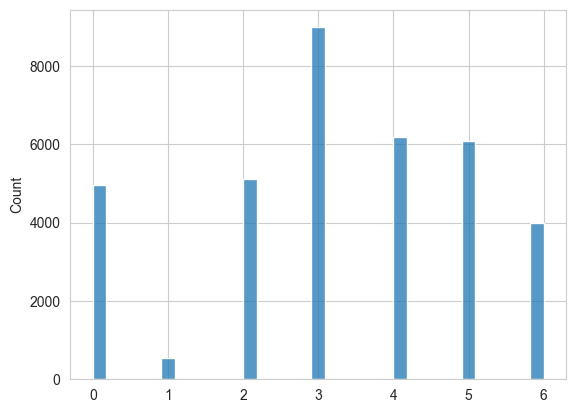

In [18]:
sns.histplot(test_labels)

<Axes: ylabel='Count'>

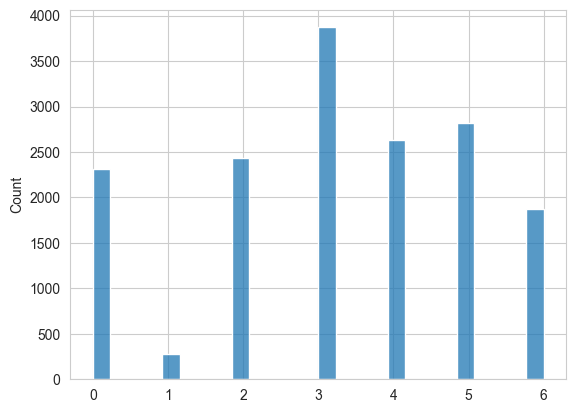

In [19]:
sns.histplot(test_labels[np.where(y_predict == 1)[0]])

<Axes: ylabel='Count'>

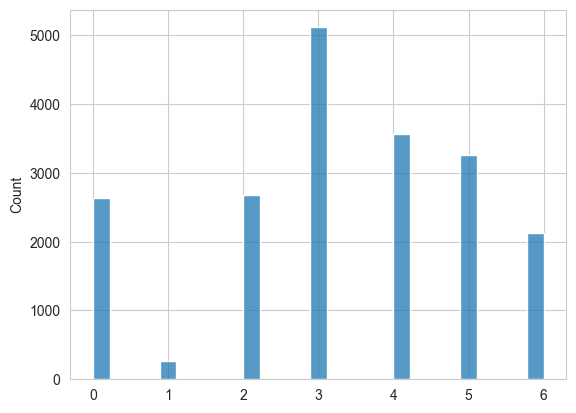

In [20]:
sns.histplot(test_labels[np.where(y_predict == 0)[0]])

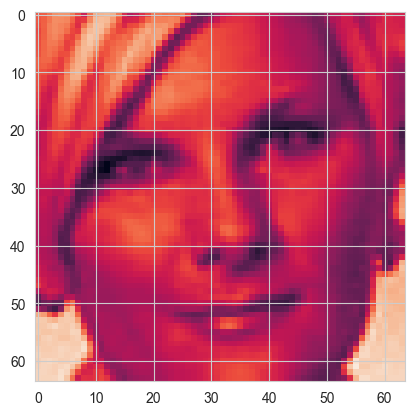

In [39]:
plt.imshow(test_images[1])